In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import torch
import torch.utils.data
import torchvision
# from torch.utils.tensorboard import SummaryWriter
from tqdm.notebook import tqdm
from icecream import ic
from collections import Counter
import sys

### Load data

In [37]:
path = r"Data/final"
image_addr_list = os.listdir(path)
ic(len(image_addr_list))
data = []
img_num = []
for i in tqdm(image_addr_list):
    full_path = os.path.join(path, i)
    imgobj = Image.open(full_path).convert('L')
    img = np.asarray(imgobj)
    data.append(img)
    img_num.append(i) # Not very useful but good for debugging

ic| len(image_addr_list): 4046


  0%|          | 0/4046 [00:00<?, ?it/s]

By double-checking, images are actually binary images with value 255 or 0.

In [38]:
data = np.array(data)
ic(data.shape)
ic(np.unique(data))

ic| data.shape: (4046, 250, 730)
ic| np.unique(data): array([  0, 255], dtype=uint8)


array([  0, 255], dtype=uint8)

In [39]:
# 0: black; 1: white (make most of the pixel to be zero (nonactivation) can probably increase performance)
data = torch.tensor(1 - (data / 255), dtype=torch.float32).unsqueeze(1)

In [45]:
ic(data.shape)

ic| data.shape: torch.Size([4046, 1, 250, 730])


torch.Size([4046, 1, 250, 730])

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7f9e075c4640>)

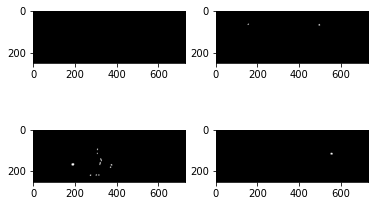

In [49]:
plt.subplot(2,2,1), plt.imshow(data[0].squeeze(), 'gray')
plt.subplot(2,2,2), plt.imshow(data[1].squeeze(), 'gray')
plt.subplot(2,2,3), plt.imshow(data[2].squeeze(), 'gray')
plt.subplot(2,2,4), plt.imshow(data[3].squeeze(), 'gray')

### Load labels